# **Model and Evaluation Trial and Errors**

## Objectives

* 

## Inputs

* inputs/cherryleaves_dataset/cherry-leaves/test
* inputs/cherryleaves_dataset/cherry-leaves/train
* inputs/cherryleaves_dataset/cherry-leaves/validation
* image shape embeddings.

```plaintext
├── inputs
│ └── cherryleaves_dataset
│ └── cherry-leaves
│   ├── test
│   │ ├── healthy
│   │ └── powdery_mildew
│   ├── train
│   │ ├── healthy
│   │ └── powdery_mildew
│   └── validation
│   │ ├── healthy
│   │ └── powdery_mildew
└── ...
``` 

## Outputs

* Image distribution plot in train, validation, and test set
* Image augementation
* Class indices to change prediction inference in labels
* Creation of ML model
* Train ML model
* Save ML model
* Create Learning Curve Plot for model performance
* Model Evaluation on pickle file
* Prediction on the random image file

---

# Import Packages

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

---

# Set Working Directory

In [6]:
cwd = os.getcwd()

In [7]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [8]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

---

## Set Input Directories
Set train, validation and test paths

In [9]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [10]:
# version = 'v1'
# file_path = f'outputs/{version}'

# if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
#     print('Old version is already available create a new version.')
#     pass
# else:
#     os.makedirs(name=file_path)


version = 'alfa'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Label Names

In [11]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


## Set Image Shape

In [12]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

# ### SET NEW IMAGE SHAPE FOR GRAY
# image_shape = (256, 256, 1)
# image_shape
# joblib.dump(value=image_shape ,
#             filename=f"{file_path}/image_shape_g.pkl")

(256, 256, 3)

---

## Images Distribution 

### Count Number of Images per Set & Label

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images




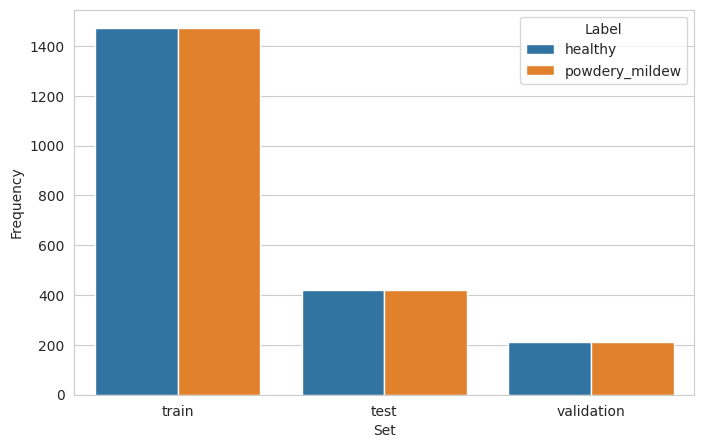

In [13]:
import plotly.express as px
import pandas as pd

df_freq = pd.DataFrame([])
for folder in ['train', 'test', 'validation']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

### Plotting the Data Using Seaborn and Matplotlib
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Label Distribution - Bar Chart

In [14]:
fig = px.bar(df_freq, 
            x="Set", 
            y="Frequency", 
            color='Label', 
            title="Cherry Leaves Dataset", 
            text="Frequency")
fig.update_layout(
    autosize=False,
    width=800, 
    height=500, 
    )
fig.show()
fig.write_image(f'{file_path}/number_leaves_sets.png')

### Set Distribution - Pie Chart

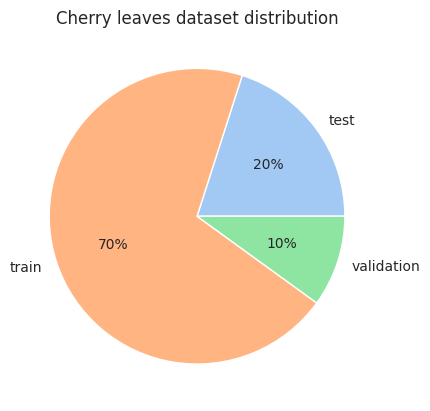

In [15]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)


colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## Image Data Augmentation

### Import ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialize ImageDataGenerator

In [17]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Set Batch Size

In [18]:
batch_size = 16

### Augment Training Image Set

In [19]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

# ### Grayscale
# train_set = augmented_image_data.flow_from_directory(train_path,
#                                                      target_size=image_shape[:2],
#                                                      color_mode='grayscale',
#                                                      batch_size=batch_size,
#                                                      class_mode='categorical',
#                                                      shuffle=True
#                                                      )

# train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Training Image Set

(16, 256, 256, 3)


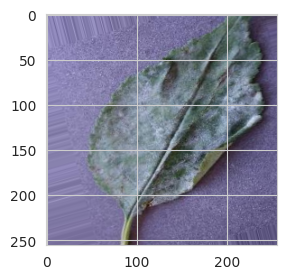

(16, 256, 256, 3)


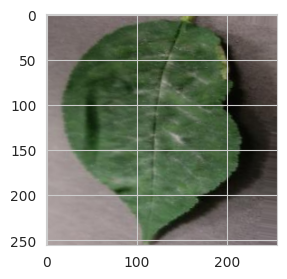

(16, 256, 256, 3)


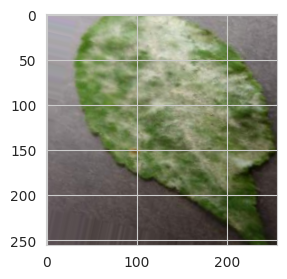

In [20]:
%matplotlib inline
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = train_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

# ### Grayscale
# for _ in range(3):
#     plt.figure(figsize=(3, 3))
#     img, label = train_set.next()
#     print(img.shape)  
#     plt.imshow(img[0], cmap='gray')
#     plt.show()

### Augment Validation Image Set

In [21]:
### Softmax RGB
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

# ### Grayscale
# validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
#                                                                         target_size=image_shape[:2],
#                                                                         color_mode='grayscale',
#                                                                         batch_size=batch_size,
#                                                                         class_mode='categorical',
#                                                                         shuffle=False
#                                                                         )

# validation_set.class_indices

# ### Sigmoid
# validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
#                                                                         target_size=image_shape[:2],
#                                                                         color_mode='rgb',
#                                                                         batch_size=batch_size,
#                                                                         class_mode='binary',
#                                                                         shuffle=False
#                                                                         )

# validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Validation Image Set

(16, 256, 256, 3)


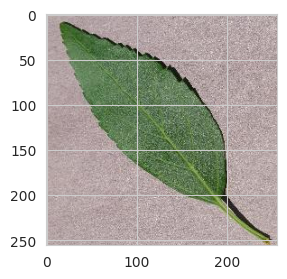

(16, 256, 256, 3)


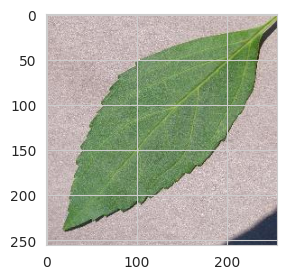

(16, 256, 256, 3)


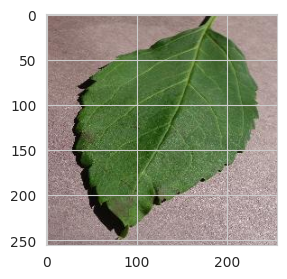

In [22]:
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = validation_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

# ### Grayscale
# for _ in range(3):
#     plt.figure(figsize=(3, 3))
#     img, label = validation_set.next()
#     print(img.shape)
#     plt.imshow(img[0], cmap='gray')
#     plt.show()

### Augment Test Image Set

In [23]:
### Softmax
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

# ### Grayscale
# test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
#                                                                   target_size=image_shape[:2],
#                                                                   color_mode='grayscale',
#                                                                   batch_size=batch_size,
#                                                                   class_mode='categorical',
#                                                                   shuffle=False
#                                                                   )

# test_set.class_indices

# ### Sigmoid
# test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
#                                                                   target_size=image_shape[:2],
#                                                                   color_mode='rgb',
#                                                                   batch_size=batch_size,
#                                                                   class_mode='binary',
#                                                                   shuffle=False
#                                                                   )

# test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Test Image Set

(16, 256, 256, 3)


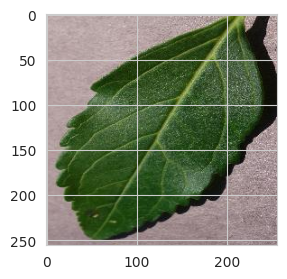

(16, 256, 256, 3)


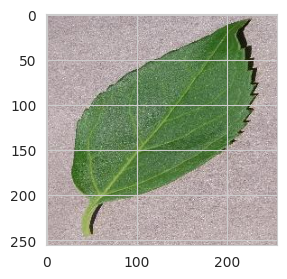

(16, 256, 256, 3)


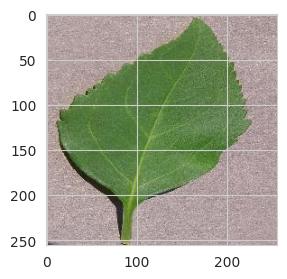

In [24]:
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Grayscale
# for _ in range(3):
#     plt.figure(figsize=(3, 3))
#     img, label = test_set.next()
#     print(img.shape)
#     plt.imshow(img[0], cmap='gray')
#     plt.show()

### Save class_indices

In [25]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/alfa/class_indices.pkl']

---

## Model Creation

### Import Packages

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad

### Model

In [27]:
def create_tf_model():
    model = Sequential()

    ### input layer
    model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ### convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))      
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ### fully connected layer
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.2))

    ### output
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adagrad',
                  metrics=['accuracy'])

    return model

# ### Sigmoid
# def create_tf_model():
#     model = Sequential()

#     ### input layer
#     model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     ### convolutional layers
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))      
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     ### fully connected layer
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(.2))

#     ### output
#     model.add(Dense(1, activation='sigmoid')) 

#     model.compile(loss='binary_crossentropy', 
#                   optimizer='adagrad',
#                   metrics=['accuracy'])

#     return model

### Model Summary

In [28]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

2024-09-02 11:18:51.112901: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Callbacks

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1, patience=2)
m_checkpoint = ModelCheckpoint(filepath='outputs/v1/powdery_mildew_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

### Fit Model for Training

In [30]:
model = create_tf_model()
model.fit(train_set,
          batch_size=batch_size,
          epochs=32,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop, m_checkpoint],
          verbose=1
          )

2024-09-02 11:27:09.794498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/32
184/184 [==============================] - 204s 1s/step - loss: 0.5301 - accuracy: 0.7266 - val_loss: 0.3269 - val_accuracy: 0.8881
Epoch 2/32
184/184 [==============================] - 203s 1s/step - loss: 0.3539 - accuracy: 0.8383 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 3/32
184/184 [==============================] - 202s 1s/step - loss: 0.2841 - accuracy: 0.8811 - val_loss: 0.1869 - val_accuracy: 0.9381
Epoch 4/32
184/184 [==============================] - 204s 1s/step - loss: 0.2355 - accuracy: 0.9079 - val_loss: 0.1528 - val_accuracy: 0.9429
Epoch 5/32
184/184 [==============================] - 203s 1s/step - loss: 0.1901 - accuracy: 0.9324 - val_loss: 0.1165 - val_accuracy: 0.9667
Epoch 6/32
184/184 [==============================] - 204s 1s/step - loss: 0.1364 - accuracy: 0.9609 - val_loss: 0.1038 - val_accuracy: 0.9833
Epoch 7/32
184/184 [==============================] - 203s 1s/step - loss: 0.1096 - accuracy: 0.9677 - val_loss: 0.0781 - val_accuracy: 0.9857

### Load Saved Best Model

In [31]:
from keras.models import load_model

load_model('outputs/v1/powdery_mildew_model.h5')

---

## Model Performance

### Training, Validation, Loss & Accuracy Over Multiple Epochs

<Figure size 500x400 with 0 Axes>

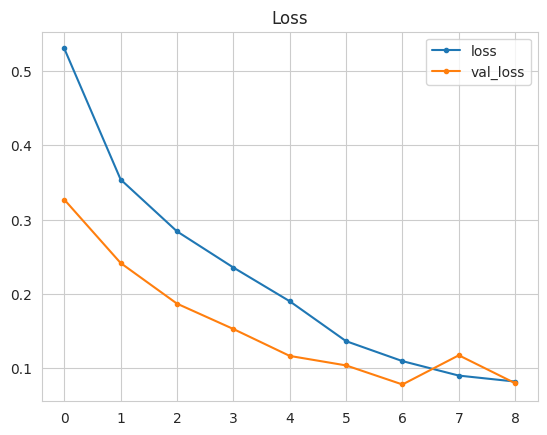

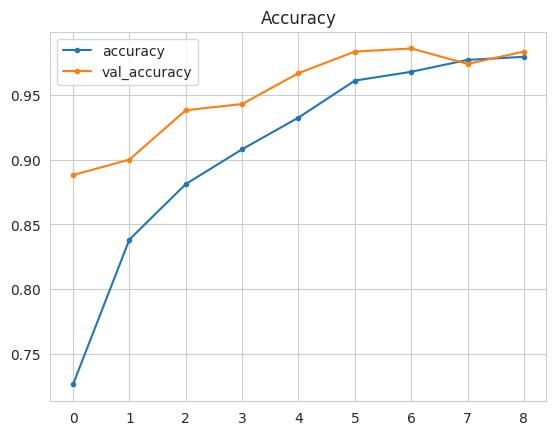

In [32]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Loss & Accuracy Over Training Epochs

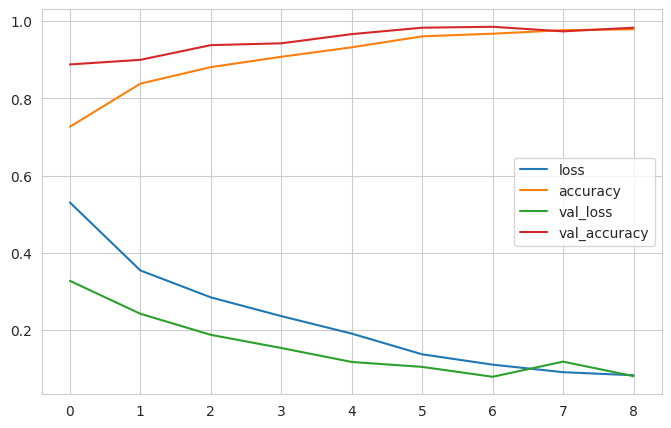

In [33]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.savefig(f'{file_path}/model_loss_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Training & Validation for Loss & Accuracy Over Epochs

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter( y=model.history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=model.history.history['loss'], name="loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=model.history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter( y=model.history.history['accuracy'], name="accuracy"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Loss/Accuracy of LSTM Model"
)

fig.update_xaxes(title_text="Epoch")

fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.update_layout(
    autosize=False,
    width=800, 
    height=500, 
    )

fig.show()
fig.write_image(f'{file_path}/model_history.png')

---

## Model Evaluation

### Import Packages

In [35]:
import sklearn
import sklearn.metrics as metrics

### Load Saved Model

In [36]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_model.h5')

### Accuracy

In [37]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ",evaluation[0])

53/53 [==============================] - 14s 269ms/step - loss: 0.0700 - accuracy: 0.9834
Model accuracy: 98.34%
Model Loss:  0.06995928287506104


### Set Accuracy Variables

In [38]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

### ROC Curve

Area Under ROC-Curve:  0.9834123222748815


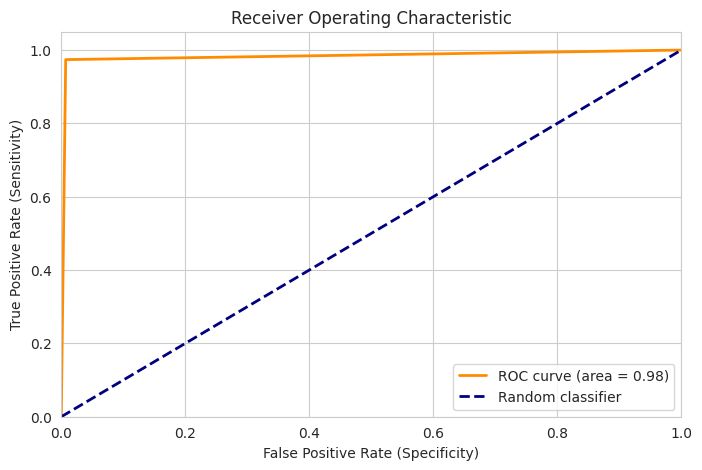

In [39]:
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score

# Set the style of the plots using seaborn
sns.set_style("whitegrid")

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Create a new figure for the ROC curve plot
plt.figure(figsize=(8, 5))

# Set line width for the plot
lw = 2

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=lw, label="Random classifier", linestyle='--')

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y axes
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc="lower right")

# Save the figure to a file with specified path and properties
plt.savefig(f'{file_path}/roccurve.png',
            bbox_inches='tight', dpi=150)
print('Area Under ROC-Curve: ', roc_auc_score(y_true, y_pred))
plt.show()

### Classification Report

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [42]:
print('Classification Report:\n----------------------\n')
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:
----------------------

                precision    recall  f1-score   support

       healthy       0.97      0.99      0.98       422
powdery_mildew       0.99      0.97      0.98       422

      accuracy                           0.98       844
     macro avg       0.98      0.98      0.98       844
  weighted avg       0.98      0.98      0.98       844



### Confusion Matrix

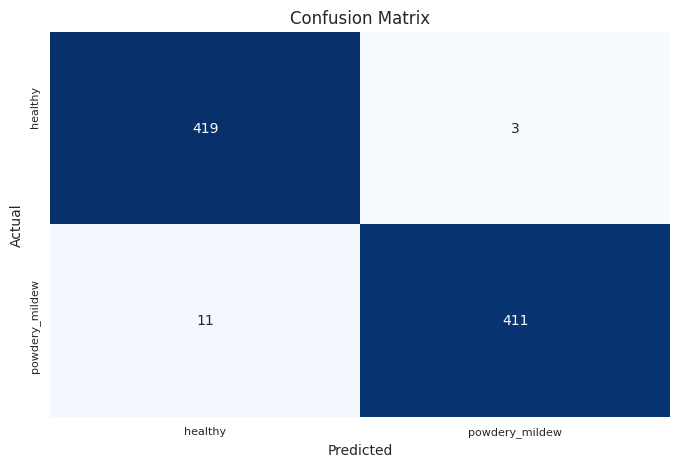

In [43]:
cm =confusion_matrix(y_true,y_pred)

# Retrieve the class labels from the test set
classes=list(test_set.class_indices.keys()) 
length=len(classes)

# Create a new figure for the confusion matrix plot
plt.figure(figsize=(8, 5))

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       

# Customize the x-axis and y-axis tick labels
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)

# Label the x-axis and y-axis
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title of the plot
plt.title("Confusion Matrix")

# Save the figure to a file with the specified path, ensuring tight bounding box and high resolution
plt.savefig(f'{file_path}/confusion_matrix.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Save Evaluation Pickle

In [44]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

---

## Predict On New Data

### Load Random Image as PIL

Image shape: (256, 256), Image mode: RGB


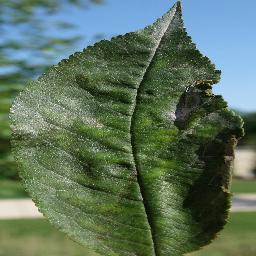

In [45]:
from tensorflow.keras.preprocessing import image

pointer = 61
label = labels[1] # select 0 for 'healthy' or 1 for 'powdery_mildew'

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

# ### Grayscale
# from tensorflow.keras.preprocessing import image

# pointer = 32
# label = labels[1]  # select healthy or powdery_mildew

# pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
#                            target_size=(256, 256, 1), color_mode='grayscale')
# print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
# pil_image

### Convert Image to Array & Prepare for Prediction

In [46]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


### Predict Class Probabilities

In [47]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba < 0.5]

if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

print(f"{pred_class} {round(pred_proba*100, 2)}%")

powdery_mildew 96.02%
